In [2]:
import pandas as pd
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#res = pd.read_csv('exp_results.csv')
res = pd.read_csv('shopee_results.csv')

res

,id,hypers,f1_score
0,1,"{'adam_eps': 4.231921981517087e-05, 'adam_mom'...",0.814901
1,2,"{'adam_eps': 3.63862743088688e-05, 'adam_mom':...",0.803538
2,3,"{'adam_eps': 4.6220876107919754e-05, 'adam_mom...",0.793954
3,4,"{'adam_eps': 3.2370295377586055e-05, 'adam_mom...",0.789229
4,5,"{'adam_eps': 4.5888398354335194e-05, 'adam_mom...",0.813444
...,...,...,...
94,95,"{'adam_eps': 5.56131011159516e-05, 'adam_mom':...",0.808864
95,96,"{'adam_eps': 2.9514892547548086e-05, 'adam_mom...",0.798957
96,97,"{'adam_eps': 1.2780602456069428e-05, 'adam_mom...",0.806832
97,98,"{'adam_eps': 5.4190431612445506e-05, 'adam_mom...",0.816242


In [36]:
arcmargin=res[res.use_argmargin==1]
arcface=res[res.use_argmargin==0]


In [44]:
arcmargin_easy=arcmargin[arcmargin.arc_easymargin==1]
arcmargin_hard=arcmargin[arcmargin.arc_easymargin==0]

In [45]:
arcmargin_easy.f1_score.mean(), arcmargin_easy.f1_score.max()

(0.8073810291644944, 0.8183885465673851)

In [46]:

arcmargin_hard.f1_score.mean(), arcmargin_hard.f1_score.max()

(0.8002828559106419, 0.8181284189969812)

In [39]:
arcface.f1_score.mean(), arcface.f1_score.max()

(0.7984497832830403, 0.8214870308658161)

In [21]:
def get_hyper(row, name):
    hypers= eval(row.hypers)
    return hypers[name]

In [22]:
def plot(hyper, key='lwlrap'):
    hyper2key = [(get_hyper(row, hyper), row[key]) for _,row in res.iterrows()]
    plt.title(hyper)
    plt.scatter(*zip(*hyper2key))
    plt.show()

In [25]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs', 'train_freeze_epochs' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    res[hyper] = [get_hyper(row, hyper) for _,row in res.iterrows()]

In [34]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs', 'train_freeze_epochs', 'arc_easymargin', 'use_argmargin' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    if hyper not in skip:
        print(hyper, res['f1_score'].corr(res[hyper],method='spearman'))

adam_eps 0.09891156462585034
adam_mom -0.061224489795918366
adam_sqr_mom 0.1190847247990105
adam_wd -0.14717377860235004
arcface_m 0.14212739641311067
arcface_s 0.1772047000618429
droput_p -0.22735930735930734
label_smooth 0.12478664192949906
lr 0.05863945578231292
lr_mult -0.0646053275524681
tokens_max_length 0.3018273955840246


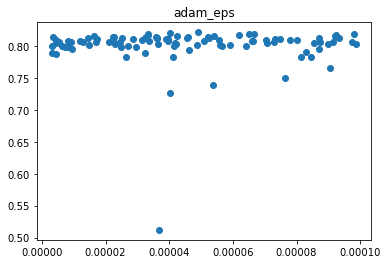

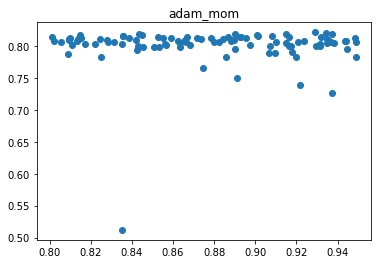

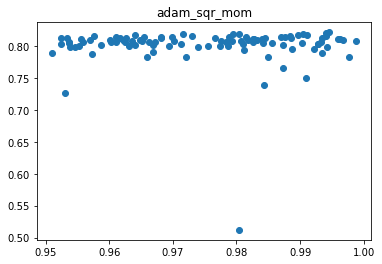

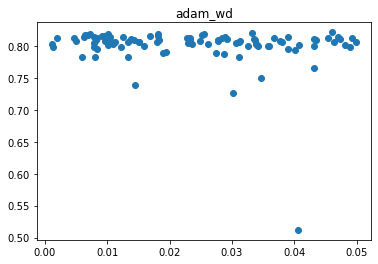

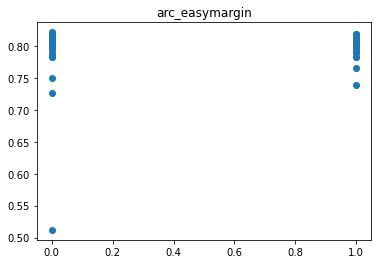

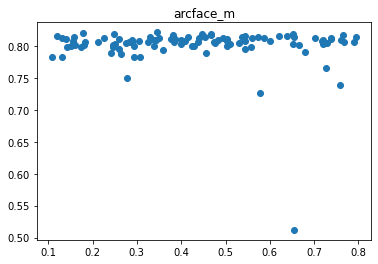

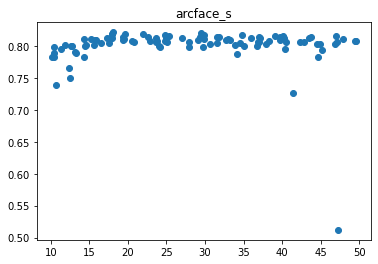

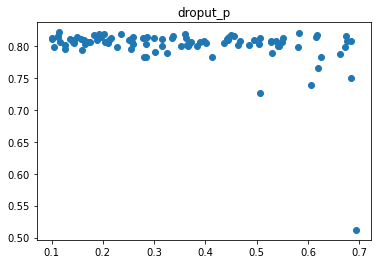

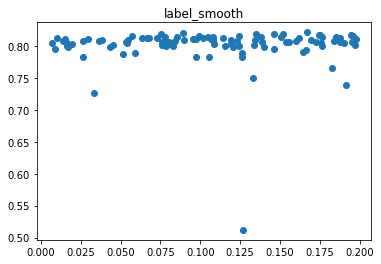

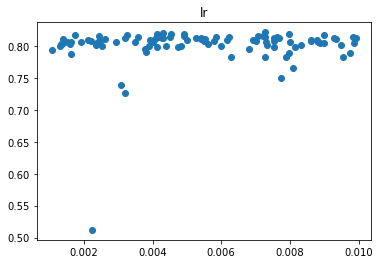

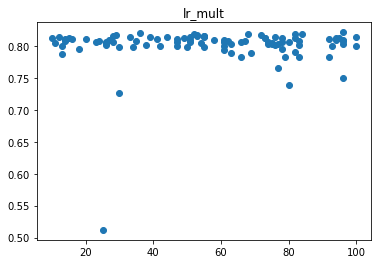

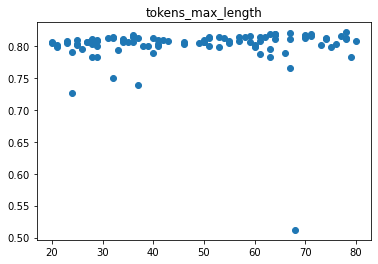

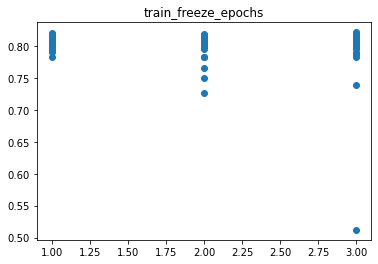

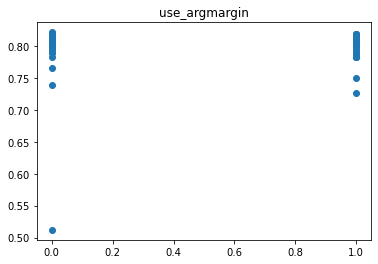

In [42]:
skip = [ 'num_epochs', 'experiment_id','bert_path', 'embs_dim','train_epochs' ]
hypers = eval(res.iloc[0].hypers).keys()
for hyper in hypers:
    
    if hyper not in skip: plot(hyper, 'f1_score')